### 掘金经营数据分析

看站长几周前的 Twitter ，掘金的发展似乎遇到了瓶颈，甚至有要关站的想法。想了下关站的原因大部分可以归结为：
 - 运营出现了问题
 - 财务出现了问题
 
运营出现了问题指的是，新增用户率、活跃用户率、用户留存率、站内流量等下降
 
财务出现了问题指的是，付费用户率下降或者拿不到投资
     - 拿不到投资的主要原因又是运营出现了问题
 
所以，关站的原因可以总结为：
 
     1. 新增用户速度下降
     2. 活跃用户率下降
     3. 用户留存率下降
     4. 付费用户率下降
     5. 站内流量下降
 
根据以上五点，结合外部能拿到的掘金数据。我抓取了掘金超过2万名用户的11万条数据，对这些数据进行了简单分析，试图一窥掘金的经营状况。

In [1]:
# 导入常用的 Packages
import numpy as np
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 从数据库中读取待分析数据
def get_data(query):
    conn = pymysql.connect(db = 'juejin',user = '******',password = '**********',port = 3306,host = '127.0.0.1')
    data = pd.read_sql_query(query,conn)
    conn.close()
    return data

In [3]:
# 读取用户数据
query_user = 'SELECT * FROM juejinuserinfo'

#读取用户对应的文章数据
query_content = 'SELECT * FROM juejincontent'

In [4]:
user = get_data(query_user)
content = get_data(query_content)

In [5]:
user.head(3)

,uid,followeesCount,followersCount,latestLoginedInAt,createdAt,username,subscribedTagsCount,totalViewsCount,viewedEntriesCount,totalCollectionsCount,juejinPower
0,1112782251882548440bd8a8,0,0,2000-01-01 00:00:00,2000-01-01 00:00:00,noexist,0,0,0,0,0
1,2202782251882548440bd8a8,36,0,2018-05-09 03:15:54,2017-08-15 04:27:14,jingtao20,2,0,0,0,0
2,55112443e4b0e3088f8ec4b3,0,20,2016-01-13 10:21:25,2015-03-24 08:45:55,Ming_Zhe,11,19156,1722,523,0


In [6]:
user.tail(3)

,uid,followeesCount,followersCount,latestLoginedInAt,createdAt,username,subscribedTagsCount,totalViewsCount,viewedEntriesCount,totalCollectionsCount,juejinPower
22452,5d3450866fb9a07eef6a4901,14,2,2019-07-21 11:46:14,2019-07-21 11:46:14,禾沐,52,0,12,0,0
22453,5d3527956fb9a07efd47490d,0,2,2019-07-22 03:03:49,2019-07-22 03:03:49,美团HR,0,0,0,0,0
22454,5d35500e6fb9a07eef6a4a57,1,1,2019-07-22 05:56:31,2019-07-22 05:56:31,十一🐳,26,0,2,0,0


In [7]:
content.head(3)

,uid,collectionCount,createdAt,originalUrl,title,viewsCount,category,objectId
0,2202782251882548440bd8a8,0,2000-01-01,https://juejin.im/post/000000000000000000000000,no post,0,no post,2202782251882548440bd8a8
1,55112443e4b0e3088f8ec4b3,0,2000-01-01,https://juejin.im/post/000000000000000000000000,no post,0,no post,55112443e4b0e3088f8ec4b3
2,55112921e4b027e59c14c7c8,0,2000-01-01,https://juejin.im/post/000000000000000000000000,no post,0,no post,55112921e4b027e59c14c7c8


In [8]:
content.tail(3)

,uid,collectionCount,createdAt,originalUrl,title,viewsCount,category,objectId
115071,5bd7fb9ce51d45219836421e,1,2019-07-26 04:26:02,https://juejin.im/post/5d3a8042e51d4555e372a6eb,驱动你做一件事的动力来源是什么？,2,代码人生,5d3a80dae51d454d544ac04f
115072,5ae7bd92518825672033d907,0,2019-07-26 04:44:36,https://juejin.im/post/5d3a8519e51d45772a49ae33,实战SpringCloud响应式微服务系列教程（第一章）,1,阅读,5d3a8533e51d4576bc1a0ee6
115073,5b50a0b9e51d45198565aae3,0,2019-07-26 04:45:36,https://juejin.im/post/5d3a8448e51d45772a49ae32,「小程序JAVA实战」小程序视图之细说列表渲染（14）,0,阅读,5d3a8570f265da1ba3290b71


### 数据清洗

user 中存在 username 字段为 noexist 的样本，这类样本对应的用户并没有实际的掘金主页。因此对应的数据也无实际意义，删除。

In [9]:
user[user['username'] =='noexist']['uid'].count()

12

In [10]:
user.drop(user[user['username'] == 'noexist'].index,inplace = True)
user[user['username'] =='noexist']['uid'].count()

0

采集程序在采集的过程中，遇到从未发布过文章的用户时，会给该用户一条虚拟的文章发布记录并标记为 createdAt = '2000-01-01'。这一批数据没有实际意义，删除。

In [11]:
content[content['createdAt'] == '2000-01-01']['uid'].count()

14935

In [12]:
content.drop(content[content['createdAt']== '2000-01-01'].index,inplace = True)
content[content['createdAt']== '2000-01-01']['uid'].count()

0

检查各变量类型和缺失情况

In [13]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22443 entries, 1 to 22454
Data columns (total 11 columns):
uid                      22443 non-null object
followeesCount           22443 non-null int64
followersCount           22443 non-null int64
latestLoginedInAt        22443 non-null datetime64[ns]
createdAt                22443 non-null datetime64[ns]
username                 22443 non-null object
subscribedTagsCount      22443 non-null int64
totalViewsCount          22443 non-null int64
viewedEntriesCount       22443 non-null int64
totalCollectionsCount    22443 non-null int64
juejinPower              22443 non-null int64
dtypes: datetime64[ns](2), int64(7), object(2)
memory usage: 2.1+ MB


In [14]:
content.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100139 entries, 1933 to 115073
Data columns (total 8 columns):
uid                100139 non-null object
collectionCount    100139 non-null int64
createdAt          100139 non-null datetime64[ns]
originalUrl        100139 non-null object
title              100139 non-null object
viewsCount         100139 non-null int64
category           100139 non-null object
objectId           100139 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 6.9+ MB


### 新增用户数量

In [15]:
user.set_index('createdAt',inplace = True,drop = False)
new_user_per_week = user.resample('w').count()

In [16]:
new_user_per_week.head()

,uid,followeesCount,followersCount,latestLoginedInAt,createdAt,username,subscribedTagsCount,totalViewsCount,viewedEntriesCount,totalCollectionsCount,juejinPower
createdAt,,,,,,,,,,,
2015-03-29,2,2,2,2,2,2,2,2,2,2,2
2015-04-05,3,3,3,3,3,3,3,3,3,3,3
2015-04-12,0,0,0,0,0,0,0,0,0,0,0
2015-04-19,9,9,9,9,9,9,9,9,9,9,9
2015-04-26,3,3,3,3,3,3,3,3,3,3,3


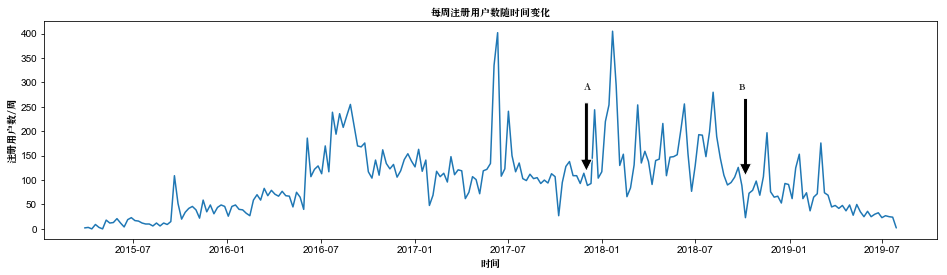

In [17]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.font_manager as fm
font = fm.FontProperties(fname='/Users/youngz/Library/Fonts/Songti.ttc')
register_matplotlib_converters()
from matplotlib.path import Path
import matplotlib.patches as patches
fig,ax = plt.subplots(figsize = (16,4))
sns.set(style="darkgrid")
sns.lineplot(x = new_user_per_week.index,y = new_user_per_week['uid'],ax =ax);
ax.set_ylabel('注册用户数/周',fontproperties = font)
ax.set_xlabel('时间',fontproperties = font)
ax.set_title('每周注册用户数随时间变化',fontproperties = font)
ax.annotate('B', xy=('2018-10-7', 100),  xycoords='data',
            xytext=('2018-10', 300), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top',
            fontproperties = font);
ax.annotate('A',xy=('2017-12',100),xycoords = 'data',
           xytext=('2017-12',300),textcoords = 'data',
            arrowprops= dict(facecolor = 'black',shrink = 0.1),
            horizontalalignment='center', verticalalignment='top',
            fontproperties = font);

从15年6月起到16年10月每周新注册用户数稳步上升，随后保持相对平稳至17年12月左右，中间有2次异常的大幅度新用户注册数增长。可能是活动等因素。从17年12月至18年9月，用户增长保持相对平稳但增长数量比前一区间高。从18年10月至今，每周新增用户数有降低趋势。

### 活跃用户数量

从外部无法直接观察到掘金的 DAU 等数据，但是掘金用户的活跃度，可以拆解为作者活跃度与读者活跃度两部分。读者活跃度变化可以参考每篇文章阅读人数变化，作者活跃度可以参考每周新发文章数量。

In [18]:
content.set_index('createdAt',drop = False,inplace = True)
content_week_read_mean  = content.resample('w').mean()
content_week_read_mean.head(3)

,collectionCount,viewsCount
createdAt,,
2016-06-26,78.666667,1584.000000
2016-07-03,167.571429,4099.285714
2016-07-10,85.277778,1804.777778


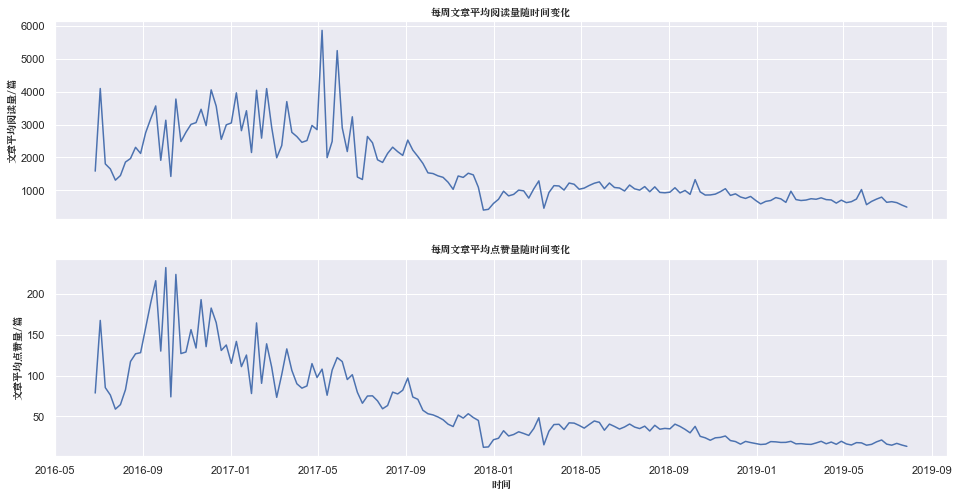

In [19]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (16,8),sharex=True)
sns.set(style="darkgrid")
sns.lineplot(x = content_week_read_mean.index,y = content_week_read_mean['viewsCount'],ax =ax1)
ax1.set_ylabel('文章平均阅读量/篇',fontproperties = font)
ax1.set_xlabel('时间',fontproperties = font)
ax1.set_title('每周文章平均阅读量随时间变化',fontproperties = font);
sns.lineplot(x = content_week_read_mean.index,y = content_week_read_mean['collectionCount'],ax =ax2)
ax2.set_ylabel('文章平均点赞量/篇',fontproperties = font)
ax2.set_xlabel('时间',fontproperties = font)
ax2.set_title('每周文章平均点赞量随时间变化',fontproperties = font);

文章的阅读和点赞有比较明显的线性关系，令人惊讶的是从2017年8月左右开始，掘金每周文章的平均阅读量和点赞量在持续下降。尤其是2018年10月左右，在上一次急剧下降的基础上，又出现一次明显的下降。

In [20]:
content_week_post_count  = content.resample('w').count()
content_week_post_count.head(3)

,uid,collectionCount,createdAt,originalUrl,title,viewsCount,category,objectId
createdAt,,,,,,,,
2016-06-26,3,3,3,3,3,3,3,3
2016-07-03,7,7,7,7,7,7,7,7
2016-07-10,18,18,18,18,18,18,18,18


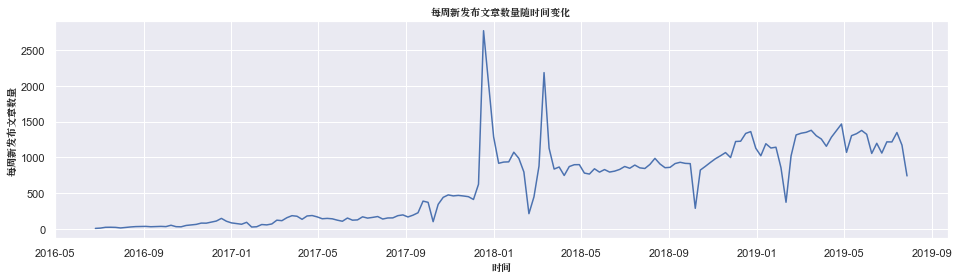

In [21]:
fig,ax = plt.subplots(1,1,figsize = (16,4),sharex=True)
sns.lineplot(x = content_week_post_count.index,y = content_week_post_count['uid'],ax =ax)
ax.set_ylabel('每周新发布文章数量',fontproperties = font)
ax.set_xlabel('时间',fontproperties = font)
ax.set_title('每周新发布文章数量随时间变化',fontproperties = font);

每周的文章发布数量在持续上涨，其中比较高的两周可能是外部因素，比较低的几个点对应着国庆和春节假期。

那么，总的阅读量如何变化呢？

In [22]:
content_week_read_sum  = content.resample('w').sum()
content_week_read_sum.head(3)

,collectionCount,viewsCount
createdAt,,
2016-06-26,236,4752
2016-07-03,1173,28695
2016-07-10,1535,32486


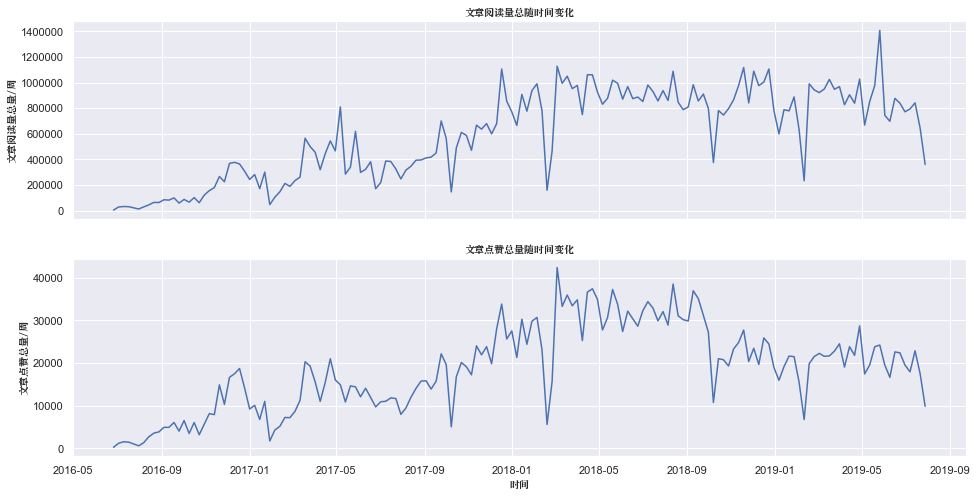

In [23]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (16,8),sharex=True)
sns.set(style="darkgrid")
sns.lineplot(x = content_week_read_mean.index,y = content_week_read_sum['viewsCount'],ax =ax1)
ax1.set_ylabel('文章阅读量总量/周',fontproperties = font)
ax1.set_xlabel('时间',fontproperties = font)
ax1.set_title('文章阅读量总随时间变化',fontproperties = font);
sns.lineplot(x = content_week_read_mean.index,y = content_week_read_sum['collectionCount'],ax =ax2)
ax2.set_ylabel('文章点赞总量/周',fontproperties = font)
ax2.set_xlabel('时间',fontproperties = font)
ax2.set_title('文章点赞总量随时间变化',fontproperties = font);

从总量来看，2017年11月之前，阅读点赞每周增速较快，2017年11月之后虽有增长但是增长幅度放缓。需要注意的是2018年10月之后，阅读总量环比增长，但点赞总量环比下降。

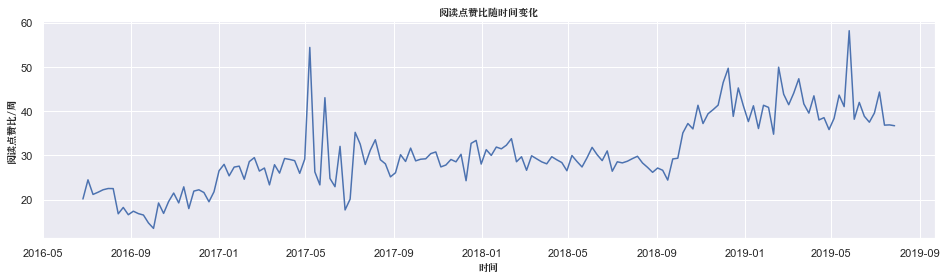

In [24]:
fig,ax = plt.subplots(1,1,figsize = (16,4),sharex=True)
sns.set(style="darkgrid")
sns.lineplot(x = content_week_read_mean.index,y = content_week_read_sum['viewsCount']/content_week_read_sum['collectionCount'],ax =ax)
ax.set_ylabel('阅读点赞比/周',fontproperties = font)
ax.set_xlabel('时间',fontproperties = font)
ax.set_title('阅读点赞比随时间变化',fontproperties = font);

从阅读点赞比随时间变化的趋势图中可以更明显的观察到2018年10月后，阅读点赞比快速增长。

### 用户留存

在外部可获得的掘金数据中，每个用户都存在一个 latestLoginedInAt 字段。

In [25]:
user.set_index('latestLoginedInAt',drop = False, inplace = True)

In [26]:
user_lastlogin_count = user.resample('w').count()

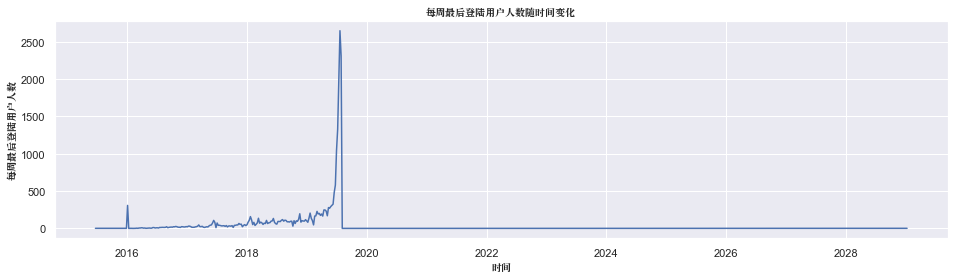

In [27]:
fig,ax = plt.subplots(1,1,figsize = (16,4))
sns.set(style = 'darkgrid')
sns.lineplot(x = user_lastlogin_count.index,y = user_lastlogin_count['uid'],ax = ax)
ax.set_xlabel('时间',fontproperties = font)
ax.set_ylabel('每周最后登陆用户人数',fontproperties = font)
ax.set_title('每周最后登陆用户人数随时间变化',fontproperties = font);

显然存在异常数据，并且数据抓取的最后几天登陆人数的数量级远高于其它日期。需要再清理。

删除异常数据及近期数据

In [28]:
user.drop(user[(user['latestLoginedInAt'].apply(lambda x:int(x.strftime('%Y%m%d')))>20190626)].index,
          inplace = True)

重新采样并绘图

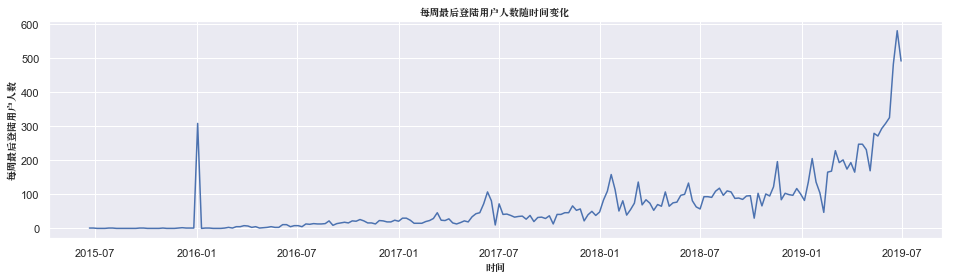

In [29]:
user_lastlogin_count = user.resample('w').count()
fig,ax = plt.subplots(1,1,figsize = (16,4))
sns.set(style = 'darkgrid')
sns.lineplot(x = user_lastlogin_count.index,y = user_lastlogin_count['uid'],ax = ax)
ax.set_xlabel('时间',fontproperties = font)
ax.set_ylabel('每周最后登陆用户人数',fontproperties = font)
ax.set_title('每周最后登陆用户人数随时间变化',fontproperties = font);

重新采样的数据使用的是 lastloginedInAt 时间早于 2019年6月26日之前的数据。这批数据的采集时间为 2019年7月26日，连续一个月未登陆的用户基本可以归类至流失用户了。从上图可以看到，除2016年1月的异常数据，掘金的流失用户数量从建站至6月26日，一直在持续上升，尤其在2019年2月左右（可能是新年假期之后）流失用户数量急剧增长。

### 付费用户（to do)

- 因为掘金目前 toC 付费产品仅小册，所以抓取掘金用户个人主页的小册购买列表及对应的小册价格，可以准确获得每个用户在掘金的消费情况。结合购买时间等维度的数据，可以一窥掘金的盈利情况

### 站内流量

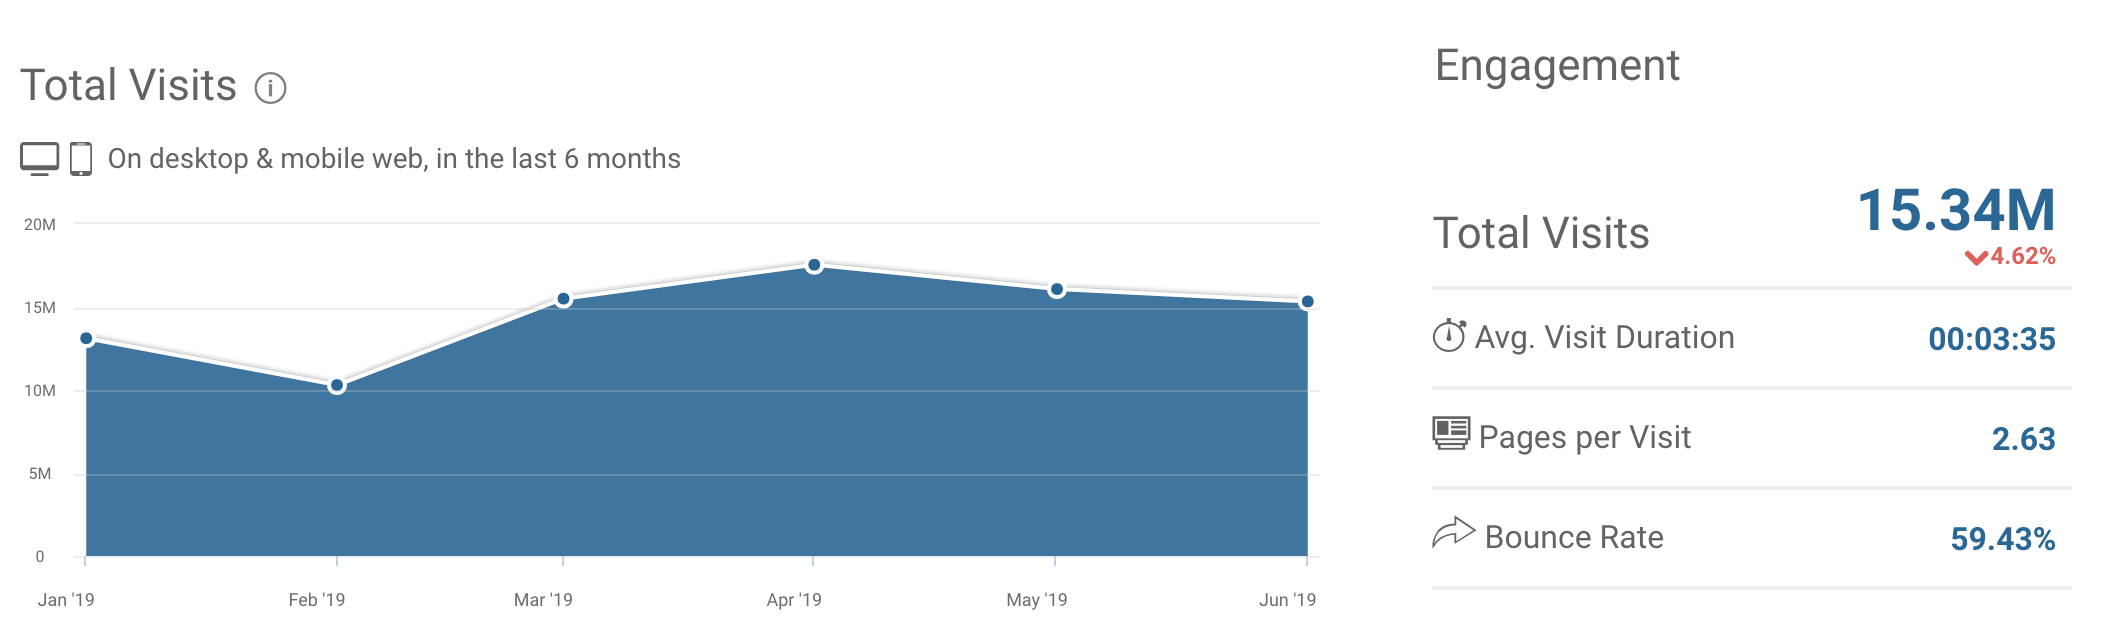

### 结论

⚠️数据的采集存在一定的偏差。因为数据采集的逻辑是从某一个用户开始，循环抓取用户的关注，而不是随机抽样。

1. 从 similarweb 的掘金流量来看，掘金从今年4月开始流量缓慢下降，52.51% 的流量来自搜索，跳出率为 59.43%。结合掘金的产品形态，跳出率与搜索流量占比如此接近，或许有相当一部分用户通过搜索进入网站后没有更多相关内容推荐。


2. 每周新增用户数量从18年10月开始缓慢下降。


3. 每篇文章平均阅读量从17年10月开始缓慢下降，而相对应的是，从17年10月开始掘金每周新增文章数量上升。内容的分发形式有可能存在问题。


4. 18年10月之后，掘金的文章阅读点赞比明显上升，掘金的内容质量可能存在问题。

回到最开始的问题，从采样到的数据情况来看，掘金的确存在一些问题，不过存在问题也就意味着有极大的优化空间。在当前产品已经深入人心的情况下，持续优化只会让掘金越来越好。产品的问题可以改，人心难得。做一个口碑爆棚的社区多艰。

再次说明：采集的数据由于非随机抽样，存在偏差。本文档仅用于一种分析思路和方法的展示，而并非掘金的真实运营情况。

### 数据细分

掘金用户根据掘金的产品形态可以分为：
1. 普通用户: 从未发布过文章的用户
2. 作者：发布过文章的用户

作者占比

In [30]:
1-14935/(22443-12)

0.3341803753733672

数据集中作者占比约为 33.4%。但是有极大可能比实际值高，因为抓取数据的程序是按照关注关系来采集用户 id，不发文章的用户更难被关注。

In [31]:
uuid = content['uid'].unique()

In [32]:
user.set_index('createdAt',drop = False,inplace = True)

In [33]:
author = user[user['uid'].isin(uuid)]

In [34]:
normal = user[~user['uid'].isin(uuid)]

#### 细分后的新增用户数量

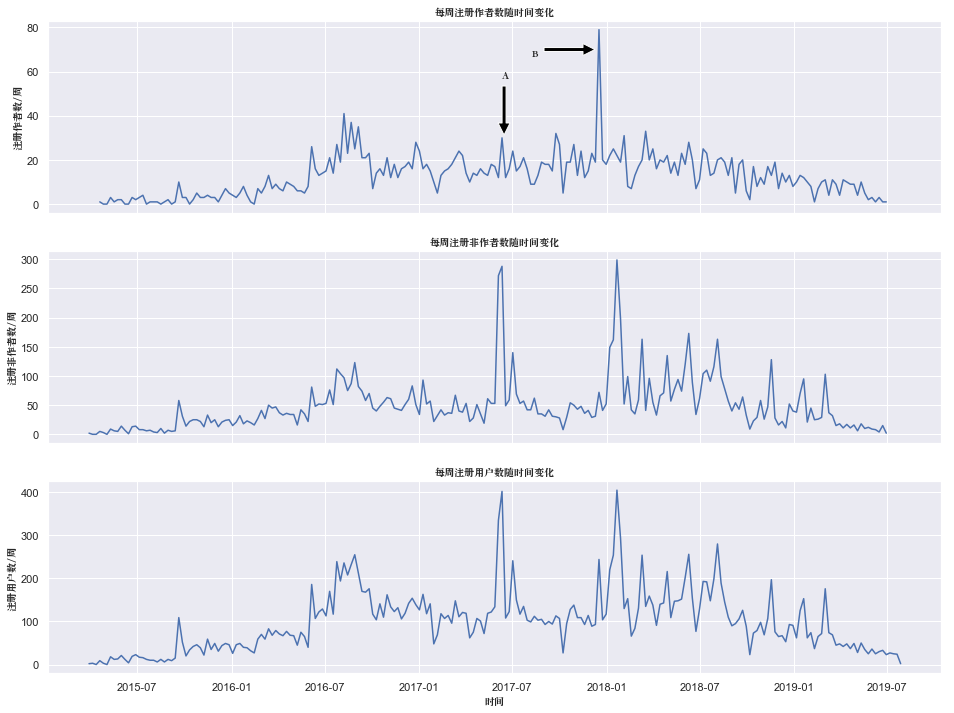

In [35]:
new_author_per_week = author.resample('w').count()
new_normal_per_week = normal.resample('w').count()
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize = (16,12),sharex = True)
sns.set(style="darkgrid")
sns.lineplot(x = new_author_per_week.index,y = new_author_per_week['uid'],ax =ax1);
ax1.set_ylabel('注册作者数/周',fontproperties = font)
ax1.set_xlabel('时间',fontproperties = font)
ax1.set_title('每周注册作者数随时间变化',fontproperties = font)
sns.lineplot(x = new_normal_per_week.index,y = new_normal_per_week['uid'],ax = ax2);
ax2.set_ylabel('注册非作者数/周',fontproperties = font)
ax2.set_xlabel('时间',fontproperties = font)
ax2.set_title('每周注册非作者数随时间变化',fontproperties = font)
sns.lineplot(x = new_user_per_week.index,y = new_user_per_week['uid'],ax =ax3);
ax3.set_ylabel('注册用户数/周',fontproperties = font)
ax3.set_xlabel('时间',fontproperties = font)
ax3.set_title('每周注册用户数随时间变化',fontproperties = font)
ax1.annotate('A', xy=('2017-06-15', 30),  xycoords='data',
            xytext=('2017-06-15', 60), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top',
            fontproperties = font);
ax1.annotate('B', xy=('2017-12-15', 70),  xycoords='data',
            xytext=('2017-08-15', 70), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='top',
            fontproperties = font);

每周新增作者数量与每周新增用户数量呈明显线性关系。在 A 点，有大量用户注册，或许是一次成功的新用户引流。在 B 点，有大量新作者注册，随后两周注册用户数也增多。

#### 细分后的用户留存

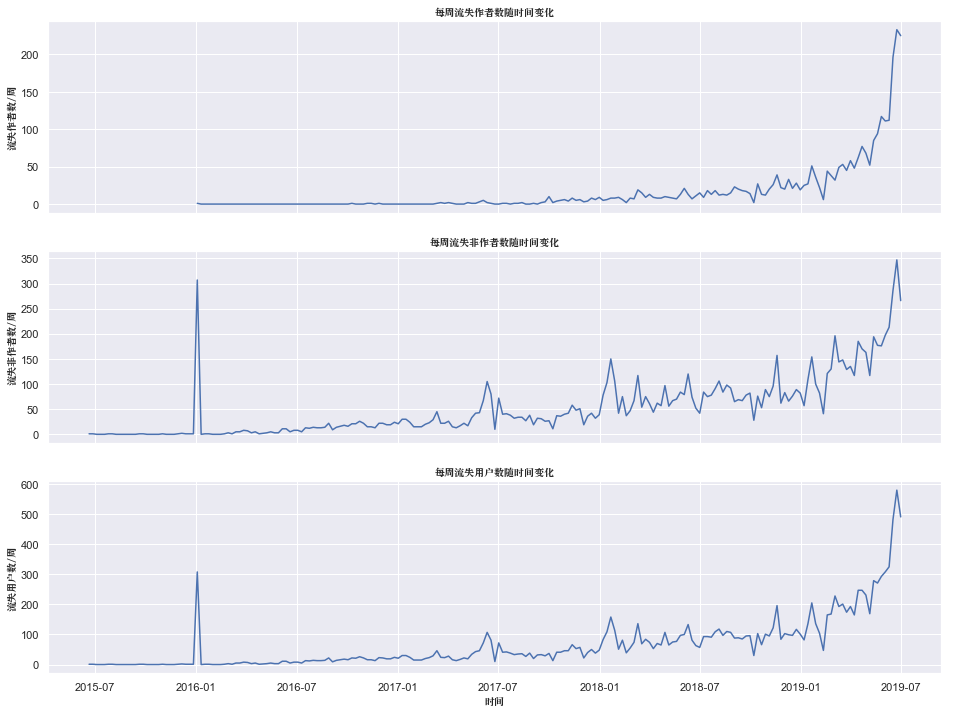

In [36]:
user.set_index('latestLoginedInAt',drop = False,inplace = True)
author = user[user['uid'].isin(uuid)]
normal = user[~user['uid'].isin(uuid)]
new_author_per_week = author.resample('w').count()
new_normal_per_week = normal.resample('w').count()
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize = (16,12),sharex = True)
sns.set(style="darkgrid")
sns.lineplot(x = new_author_per_week.index,y = new_author_per_week['uid'],ax =ax1);
ax1.set_ylabel('流失作者数/周',fontproperties = font)
ax1.set_xlabel('时间',fontproperties = font)
ax1.set_title('每周流失作者数随时间变化',fontproperties = font)
sns.lineplot(x = new_normal_per_week.index,y = new_normal_per_week['uid'],ax = ax2);
ax2.set_ylabel('流失非作者数/周',fontproperties = font)
ax2.set_xlabel('时间',fontproperties = font)
ax2.set_title('每周流失非作者数随时间变化',fontproperties = font)
sns.lineplot(x = user_lastlogin_count.index,y = user_lastlogin_count['uid'],ax = ax3);
ax3.set_ylabel('流失用户数/周',fontproperties = font)
ax3.set_xlabel('时间',fontproperties = font)
ax3.set_title('每周流失用户数随时间变化',fontproperties = font);